In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Normal Distribution

In [2]:
def norm_pdf(x, mu=0, sigma=1):
    '''
    Probability density function for a normal continuous random variable.

    Parameters
    ----------
    x : array-like
        Real number(s)

    mu : float, default=0
        Mean
    
    sigma : float, default=1
        Standard Deviation

    Returns
    -------
    density : array-like
        Probability density for every value of x
    '''
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

## Data Generation

Generate 50 samples from a normal distribution with mean μ=10, and standard deviation σ=5.

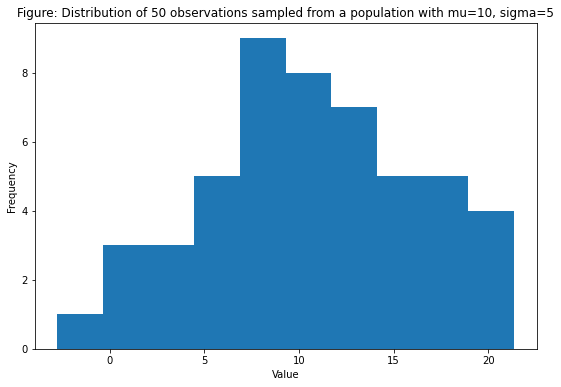

In [3]:
np.random.seed(0)

# Number of samples to draw
n = 50

# Sample data points from a normal distribution with mean 10 and standard deviation 5
mu, sigma = 10, 5
samples = np.random.normal(loc=mu, scale=sigma, size=n)

# Calculate population mean
x_bar = samples.mean()

# Histogram of sampled data points (value vs frequency)
plt.figure(figsize=(9,6))
plt.hist(samples, bins=10)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Figure: Distribution of 50 observations sampled from a population with mu=10, sigma=5")
plt.show()

## Prior

Prior is a normal distribution with mean μ=25, and standard deviation σ=5.

In [4]:
# Normal prior with mean 25 and standard deviation 5
mu_prior, sigma_prior = 25, 5

## Likelihood

For $n$ i.i.d. samples $x_1, x_2, ..., x_n$, we can calculate the likelihood as follows;

$$
\begin{align*}
P(x_1, x_2, ..., x_n|\mu, \sigma^2) &= P(x_1|\mu, \sigma^2) P(x_2|\mu, \sigma^2) ... P(x_n|\mu, \sigma^2) \\
&= \prod_{i=1}^{n} P(x_i|\mu, \sigma^2) \\
&= \prod_{i=1}^{n} \frac {1} {\sqrt{2 \pi \sigma^2}} exp \left( {\frac{-(x_i-\mu)^2}{2 \sigma^2}} \right) \\
&= \left( \frac {1} {\sqrt{2 \pi \sigma^2}} \right)^n exp \left( {\frac{-\sum_{i=1}^n (x_i-\mu)^2}{2 \sigma^2}} \right) \\
&\propto exp \left( {\frac{-\sum_{i=1}^n (x_i-\mu)^2}{2 \sigma^2}} \right) \\
&\propto exp \left( {\frac {- \left(\sum_{i=1}^n x_i^2 + n \mu^2 - 2 \mu \sum_{i=1}^n x_i \right)} {2 \sigma^2}} \right) \\
&\propto exp \left( {\frac {-n} {2 \sigma^2} \left( \mu^2 - 2\mu \frac{\sum_{i=1}^n x_i}{n} + \frac{\sum_{i=1}^n x_i^2} {n}  \right)} \right) \\
&\propto exp \left( {\frac {-1} {2 \left( \sigma^2 / n \right)} \left( \mu^2 - 2\mu \bar{x} + \frac{\sum_{i=1}^n x_i^2} {n}  \right)} \right) \\
&\propto exp \left( {\frac {-1} {2 \left( \sigma^2 / n \right)} \left( \mu^2 - 2\mu \bar{x} + \bar{x}^2 - \bar{x}^2 + \frac{\sum_{i=1}^n x_i^2} {n}  \right)} \right) \\
&\propto exp \left( {\frac {-1} {2 \left( \sigma^2 / n \right)} \left( \mu^2 - 2\mu \bar{x} + \bar{x}^2 \right)} \right) exp \left( {\frac {-1} {2 \left( \sigma^2 / n \right)} \left( \frac{\sum_{i=1}^n x_i^2} {n} - \bar{x}^2 \right)} \right) \\
&\propto exp \left( {\frac {-1} {2 \left( \sigma^2 / n \right)} \left( \mu^2 - 2\mu \bar{x} + \bar{x}^2 \right)} \right) \\
&\propto exp \left( {\frac {-1} {2 \left( \sigma^2 / n \right)} \left( \mu - \bar{x} \right)^2} \right)
\end{align*}
$$

Therefore, the probability density function for the likelihood is $\mathcal{N}(\bar {x}, \frac{\sigma^2}{n})$ i.e. $\mu_L = \bar {x}$ and $\sigma_L = \sigma / \sqrt{n}$

In [5]:
# Calculate the parameters of Likelihood
mu_likelihood = x_bar
sigma_likelihood = sigma / np.sqrt(n)

print(f"Mean of the distribution of Likelihood = {mu_likelihood}")
print(f"Standard Deviation of the distribution of Likelihood = {sigma_likelihood}")

Mean of the distribution of Likelihood = 10.702796361565493
Standard Deviation of the distribution of Likelihood = 0.7071067811865475


## Posterior

Since, it is given that prior is a normal distribution, let's take prior as $\mathcal{N}(\mu_{prior}, \sigma_{prior}^2)$

<br>

$$
\begin{align*}
Posterior &= Prior * Likelihood \\

&\propto exp \left[\frac{-(\mu - \mu_{prior})^2}{2\sigma_{prior}^2} \right] * exp \left[\frac{-n(\mu - \bar{x})^2}{2\sigma^2}\right] \\

&\propto exp \left[\frac{-(\mu^2 -2\mu\mu_{prior} + \mu_{prior}^2)}{2\sigma_{prior}^2} \right] * exp \left[\frac{-n(\mu^2 -2\mu\bar{x} + \bar{x}^2)}{2\sigma^2}\right] \\

&\propto exp \left[\frac{-(\mu^2 -2\mu\mu_{prior} + \mu_{prior}^2)}{2\sigma_{prior}^2} \right] * exp \left[\frac{-n(\mu^2 -2\mu\bar{x} + \bar{x}^2)}{2\sigma^2}\right] \\

&\propto exp \left[\frac{-(\mu^2 -2\mu\mu_{prior} + \mu_{prior}^2)}{2\sigma_{prior}^2} + \frac{-n(\mu^2 -2\mu\bar{x} + \bar{x}^2)}{2\sigma^2 }\right] \\

&\propto exp \left[\frac{-1} {2(\sigma^2 \sigma_{prior}^2)} \Bigl( (\mu^2 -2\mu\mu_{prior} + \mu_{prior}^2 ) \sigma^2 + n(\mu^2 -2\mu\bar{x} + \bar{x}^2) \sigma_{prior}^2 \Bigr) \right] \\

&\propto exp \left[\frac{-1} {2 \left(\frac{\sigma^2 \sigma_{prior}^2} {\sigma^2 + n\sigma_{prior}^2} \right)} \left(\mu^2 -2\mu(\frac{\sigma^2\mu_{prior} + n\sigma_{prior}^2\bar{x}}{\sigma^2 + n\sigma_{prior}^2}) + (\frac{\sigma^2\mu_{prior}^2 + n\sigma_{prior}^2\bar{x}^2}{\sigma^2 + n\sigma_{prior}^2}) \right) \right] \\

&\small{} \text{ (Completing the squares and ignoring the constant terms) } \\

&\propto exp \left[\frac{-1} {2 \left(\frac{\sigma^2 \sigma_{prior}^2} {\sigma^2 + n\sigma_{prior}^2} \right)} \left(\mu^2 - 2\mu(\frac{\sigma^2\mu_{prior} + n\sigma_{prior}^2\bar{x}}{\sigma^2 + n\sigma_{prior}^2}) + (\frac{\sigma^2\mu_{prior} + n\sigma_{prior}^2\bar{x}}{\sigma^2 + n\sigma_{prior}^2})^2 \right) \right] \\

&\propto exp \left[\frac{-1} {2 \left(\frac{\sigma^2 \sigma_{prior}^2} {\sigma^2 + n\sigma_{prior}^2} \right)} \left(\mu - (\frac{\sigma^2\mu_{prior} + n\sigma_{prior}^2\bar{x}}{\sigma^2 + n\sigma_{prior}^2}) \right)^2 \right]

\end{align*}
$$

Therefore, the probability density function for the posterior is $\mathcal{N}\left(\frac{\sigma^2\mu_{prior} + n\sigma_{prior}^2\bar{x}}{\sigma^2 + n\sigma_{prior}^2}, \frac{\sigma^2 \sigma_{prior}^2} {\sigma^2 + n\sigma_{prior}^2}\right)$

In [9]:
# Calculate the parameters of Posterior
sigma_sq = np.square(sigma)
sigma_prior_sq = np.square(sigma_prior)

mu_posterior = (sigma_sq * mu_prior + n * sigma_prior_sq * x_bar) / (sigma_sq + n * sigma_prior_sq)
sigma_posterior = np.sqrt((sigma_sq * sigma_prior_sq ) / (sigma_sq + n * sigma_prior_sq))

print(f"Mean of the distribution of Posterior = {mu_posterior}")
print(f"Standard Deviation of the distribution of Posterior = {sigma_posterior}")

Mean of the distribution of Posterior = 10.983133687809307
Standard Deviation of the distribution of Posterior = 0.7001400420140049


## PDFs of Prior, Likelihood & Posterior

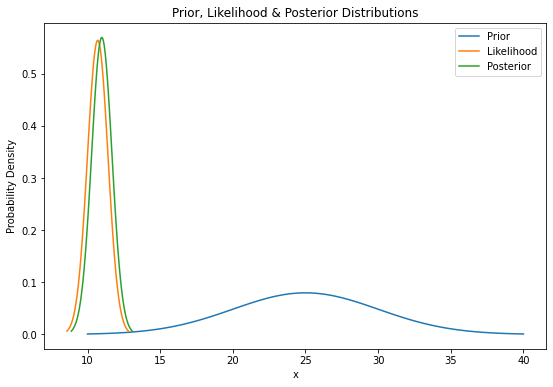

In [19]:
plt.figure(figsize=(9,6))

# Plot the pdf of Prior distribution
prior_x = np.linspace(mu_prior - 3 * sigma_prior, mu_prior + 3 * sigma_prior, 100)
plt.plot(prior_x, norm_pdf(prior_x, mu_prior, sigma_prior), label='Prior')

# Plot the pdf of Likelihood distribution
likelihood_x = np.linspace(mu_likelihood - 3 * sigma_likelihood, mu_likelihood + 3 * sigma_likelihood, 100)
plt.plot(likelihood_x, norm_pdf(likelihood_x, mu_likelihood, sigma_likelihood), label='Likelihood')

# Plot the pdf of Posterior distribution
posterior_x = np.linspace(mu_posterior - 3 * sigma_posterior, mu_posterior + 3 * sigma_posterior, 100)
plt.plot(posterior_x, norm_pdf(posterior_x, mu_posterior, sigma_posterior), label='Posterior')

plt.legend()
plt.title('Prior, Likelihood & Posterior Distributions')
plt.ylabel('Probability Density')
plt.xlabel('x')
plt.show()

## Metropolis-Hastings Algorithm

In [6]:
def gaussian_MH_sampler(params_likelihood, params_prior, n_iter_no_change=100, prop_width=4, n_iter=100_000, tol=1e-6, random_seed=0):
    '''
    Estimate the distribution given a few samples of it using Metropolis-Hastings algorithm.

    Probability Density of proposal distribution = Density of Likelihood * Density of Prior

    Parameters
    ----------
    params_likelihood : ndarray of shape (2,)
        Parameters (Mean & Standard Deviation) of Likelihood distribution.

    params_prior : ndarray of shape (2,)
        Parameters (Mean & Standard Deviation) of Prior distribution.
        
    n_iter_no_change : int, default=500
        Number of iterations with no improvement to wait before stopping.

    prop_width : float, default=4
        Standard Deviation of proposal distribution, aka proposal width.
        Stepsize of MCMC.

    n_iter : int, default=100_000
        Number of iterations(hops).

    tol : float, default=1e-6
        Tolerence limit for the convergence of algorithm.

    random_seed : int, default=0
        Seed for RandomState.

    Returns
    -------
    samples : array-like
        Samples of the estimated distribution.

    acceptance_ratio : float
        Ratio of accepted number of samples to total number of samples.

    efficiency : float
        Ratio of number of retained samples to total number of samples.

    n_iter_converge : int
        Number of iterations after which algorithm converges
    '''
    
    # Seed the generator
    np.random.seed(random_seed)

    # Init the number of samples to reject
    burn_in = int(n_iter*0.01)

    # Init the MCMC chain as an array
    samples = np.array([1])

    # Init number of accepted samples with 0, history of sample mean(s), count of iterations with change in mean lesser than tolerance
    n_accepted = 0

    for itr in range(n_iter):
        # Current state of MCMC chain
        curr_state = samples[-1]

        # Sample candidate from normal distribution with mu as previous sample & sigma as proposal width
        candidate = np.random.normal(curr_state, prop_width)

        # Calculate the normal probability density of proposal distribution at current state
        curr_state_prob = norm_pdf(x=curr_state, mu=params_likelihood[0], sigma=params_likelihood[1]) * norm_pdf(x=curr_state, mu=params_prior[0], sigma=params_prior[1])

        # Calculate the normal probability density of proposal distribution at candidate(to be next state)
        candidate_prob = norm_pdf(x=candidate, mu=params_likelihood[0], sigma=params_likelihood[1]) * norm_pdf(x=candidate, mu=params_prior[0], sigma=params_prior[1])
        
        # Calculate probability of accepting this candidate
        prob = min(1, candidate_prob / curr_state_prob)
        
        # Accept with the calculated probability
        if np.random.random() < prob:
            samples = np.append(samples, candidate)
            n_accepted += 1
            
        # Otherwise report current sample again
        else:
            samples = np.append(samples, curr_state)

        # Convergence check
        if (itr > n_iter_no_change):
            # Mean of last `n_iter_no_change` samples
            mean_last_n = samples[-n_iter_no_change:].mean()

            # Mean of samples without last `n_iter_no_change` samples
            mean_without_last_n = samples[:-n_iter_no_change].mean()

            # Break if differnce is below tolerance limit
            if (np.abs(mean_last_n - mean_without_last_n) <= tol):
                break

    # Reject initial samples
    retained_samples = samples[burn_in:]

    # Calculate acceptance ratio & efficiency of the algorithm
    acceptance_ratio = np.round(n_accepted / n_iter, 3)
    efficiency = np.round(len(retained_samples) / n_iter, 3)

    return retained_samples, acceptance_ratio, efficiency, itr

## Estimating the posterior distribution using MH Sampler

In [11]:
est_posterior , acc_ratio , eta, n_iter_converge = gaussian_MH_sampler(params_likelihood=[mu_likelihood, sigma_likelihood], params_prior=[mu_prior, sigma_prior])

print(f'Mean of estimated posterior distribution = {est_posterior.mean()}')
print(f'Mean of analytic posterior distribution = {mu_posterior}')
print(f'Mean of initial data samples = {x_bar}')
print(f'MH Sampler has converged after {n_iter_converge} iterations with an efficiency of {eta}')

Mean of estimated posterior distribution = 10.971012656678814
Mean of analytic posterior distribution = 10.983133687809307
Mean of initial data samples = 10.702796361565493
MH Sampler has converged after 99999 iterations with an efficiency of 0.99


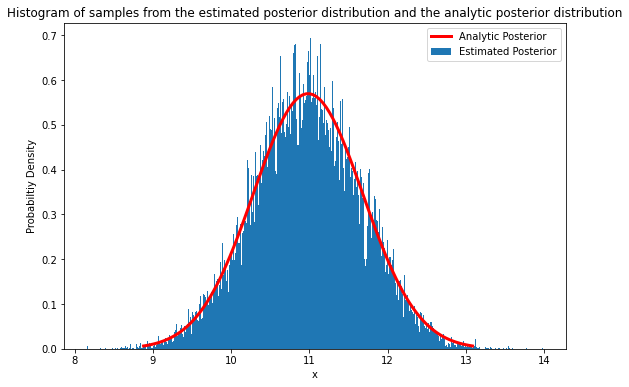

In [20]:
# Plotting a histogram of samples from the estimated posterior distribution alongside the analytic posterior distribution
plt.figure(figsize=(9,6))
plt.hist(est_posterior, bins=500, density=True, label='Estimated Posterior')
plt.xlabel('x')
plt.ylabel('Probabiltiy Density')
plt.title('Histogram of samples from the estimated posterior distribution and the analytic posterior distribution')
plt.plot(posterior_x, norm_pdf(posterior_x, mu_posterior, sigma_posterior), label='Analytic Posterior', color='r', linewidth=3)
plt.legend()
plt.show()